In [28]:
import pandas as pd
import networkx as nx
import scripts as scr
import fileloader as fl
import dataframes as df
import seaborn as sns

In [3]:
#reload if needed
import importlib
importlib.reload(fl)
importlib.reload(scr)
import fileloader as fl
import scripts as scr
import matplotlib as plt

In [29]:
graph = fl.get_network()

In [5]:
edgelist = list(graph.edges())
edge = edgelist[0]

In [6]:
graphs = fl.load_obj(",".join(edge), 'awsgraphs/')

In [7]:
frame = pd.DataFrame()

In [8]:
frame[edge] = pd.Series(nx.get_edge_attributes(list(graphs.values())[3], 'passengers'))

In [9]:
frame['capacity'] = pd.Series(nx.get_edge_attributes(list(graphs.values())[1], 'capacity'))

In [10]:
frame

(Acton Town, Chiswick Park)  capacity
Acton Town      Chiswick Park                                  0     36945
                Ealing Common                              13512     17100
                South Ealing                               11874     28728
                Turnham Green                              24420         0
Aldgate         Liverpool Street LU                        11677     59508
...                                                          ...       ...
Canning Town    North Greenwich                            26168     61250
Cutty Sark      Greenwich                                      0     18744
Greenwich       Deptford Bridge                                0     18744
Deptford Bridge Elverson Road                                  0     18744
Elverson Road   Lewisham                                       0         0

[349 rows x 2 columns]

In [71]:
#frame.to_excel("output.xlsx")

In [11]:
basepassenger = fl.load_obj('basepassfixed')

In [12]:
def n1_table(graph, timeslots, attribute):
    dfs = {}
    tempdf = pd.DataFrame(index=graph.edges())
    pcol = pd.Series(nx.get_edge_attributes(basepassenger.get(scr.timeslots[0]), 'passengers'))    
    capcol = pd.Series(nx.get_edge_attributes(basepassenger.get(scr.timeslots[0]), 'capacity'))    
    for timeslot in timeslots:
        for edge in graph.edges():
            tempgraphs = fl.load_obj(",".join(edge), 'awsgraphs/')
            tempdf[edge] = pd.Series(nx.get_edge_attributes(tempgraphs.get(timeslot), attribute))       
        dfs.update([(timeslot, tempdf)]) #for some obscure reason update(timeslot = tempdf) wasn't working. 
        
    return pd.concat(dfs, axis=1)



In [14]:
#table = n1_table(graph, scr.timeslots, 'passengers')

KeyboardInterrupt: 

In [32]:
#fl.save_obj(table, "passengertable", 'dataframes/')

In [15]:
table = fl.load_obj("passengertable", 'dataframes/')

In [16]:
table   

Morning (0500-0700)  \
                                    (Acton Town, Chiswick Park)   
Acton Town      Chiswick Park                                 0   
                Ealing Common                               110   
                South Ealing                                177   
                Turnham Green                               358   
Aldgate         Liverpool Street LU                           0   
...                                                         ...   
Canning Town    North Greenwich                             550   
Cutty Sark      Greenwich                                     0   
Greenwich       Deptford Bridge                               0   
Deptford Bridge Elverson Road                                 0   
Elverson Road   Lewisham                                      0   

                                                                 \
                                    (Acton Town, Ealing Common)   
Acton Town      Chiswick Park                                 0   
                Ealing Common                                 0   
                South Ealing                                177   
                Turnham Green                               248   
Aldgate         Liverpool Street LU                           0   
...                                                         ...   
Canning Town    North Greenwich                             550   
Cutty Sark      Greenwich                                     0   
Greenwich       Deptford Bridge                               0   
Deptford Bridge Elverson Road                                 0   
Elverson Road   Lewisham                                      0   

                                                                \
                                    (Acton Town, South Ealing)   
Acton Town      Chiswick Park                                0   
                Ealing Common                                0   
                South Ealing                                 0   
                Turnham Green                               79   
Aldgate         Liverpool Street LU                          0   
...                                                        ...   
Canning Town    North Greenwich                            550   
Cutty Sark      Greenwich                                    0   
Greenwich       Deptford Bridge                              0   
Deptford Bridge Elverson Road                                0   
Elverson Road   Lewisham                                     0   

                                                                 \
                                    (Acton Town, Turnham Green)   
Acton Town      Chiswick Park                                79   
                Ealing Common                                 0   
                South Ealing                                  0   
                Turnham Green                                 0   
Aldgate         Liverpool Street LU                           0   
...                                                         ...   
Canning Town    North Greenwich                             550   
Cutty Sark      Greenwich                                     0   
Greenwich       Deptford Bridge                               0   
Deptford Bridge Elverson Road                                 0   
Elverson Road   Lewisham                                      0   

                                                                    \
                                    (Aldgate, Liverpool Street LU)   
Acton Town      Chiswick Park                                   79   
                Ealing Common                                    0   
                South Ealing                                     0   
                Turnham Green                                    0   
Aldgate         Liverpool Street LU                              0   
...                                                            ...   
Canning T

In [51]:
pasag = pd.DataFrame()
difag = pd.DataFrame()
for timeslot in scr.timeslots:
    pasdf = pd.DataFrame(index=graph.edges())
    diffdf = pd.DataFrame(index=graph.edges())
    pcol = pd.Series(nx.get_edge_attributes(basepassenger.get(timeslot), 'passengers'))    
    capcol = pd.Series(nx.get_edge_attributes(basepassenger.get(timeslot), 'capacity')) 
    pasdf['base'] = pcol
    for edge in graph.edges():
        n1graphs = fl.load_obj(",".join(edge), 'awsgraphs2/') #load disrupted graphs
        pas = pd.Series(nx.get_edge_attributes(n1graphs.get(timeslot), 'passengers'))    
        diffdf[edge] = (pas - pcol)/capcol
        pasdf[edge] = pas
    pasag[timeslot] = pasdf
    difag[timeslot] = diffdf

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [18]:
lst = [('Waterloo', 'Westminster'), #Highest betweenness
 ('Bank and Monument', 'Waterloo'),
 ('Green Park', 'Westminster'),
 ('Bethnal Green LU', 'Liverpool Street LU'),
 ('Bond Street', 'Green Park'),
 ('Bethnal Green LU', 'Mile End'),
 ('Mile End', 'Stratford'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Bond Street'),
 ('Bank and Monument', 'Liverpool Street LU'),
 ('Finchley Road', 'Wembley Park'),
 ('Gloucester Road', 'South Kensington'),
 ("Earl's Court", 'Gloucester Road'),
 ('Preston Road', 'Wembley Park'),
 ('Baker Street', 'Edgware Road (C)'),
 ('Edgware Road (C)', 'Paddington TfL'),
 ('Barons Court', "Earl's Court"),
 ('Northwick Park', 'Preston Road'),
 ('Barons Court', 'Hammersmith'),
 ('Camden Town', 'Euston'),
 ('Harrow-on-the-Hill', 'Northwick Park'),
 ('Leyton', 'Stratford'),
 ('Leyton', 'Leytonstone'),
 ('Hammersmith', 'Turnham Green'),
 ('Stratford', 'West Ham')]

lst2 = [('Heathrow Terminals 1, 2 & 3', 'Heathrow Terminal 4'), #lowest betweenness
 ('Camden Town', 'Mornington Crescent'),
 ('Dollis Hill', 'Willesden Green'),
 ('Barons Court', 'West Kensington'),
 ('Acton Town', 'Chiswick Park'),
 ('Poplar', 'West India Quay'),
 ('Bromley-By-Bow', 'West Ham'),
 ('Leicester Square', 'Tottenham Court Road'),
 ('Goodge Street', 'Warren Street'),
 ('Edgware Road (B)', 'Paddington TfL'),
 ('Ravenscourt Park', 'Stamford Brook'),
 ("St. John's Wood", 'Swiss Cottage'),
 ('Bow Church', 'Devons Road'),
 ('Elephant & Castle LU', 'Lambeth North'),
 ('Arsenal', 'Holloway Road'),
 ('Rotherhithe', 'Canada Water'),
 ('Covent Garden', 'Leicester Square'),
 ('Arsenal', 'Finsbury Park'),
 ('Fairlop', 'Hainault'),
 ('Grange Hill', 'Hainault'),
 ('Finchley Road', 'Swiss Cottage'),
 ('Charing Cross LU', 'Leicester Square'),
 ('Goodge Street', 'Tottenham Court Road'),
 ('Covent Garden', 'Holborn'),
 ('Stamford Brook', 'Turnham Green')]

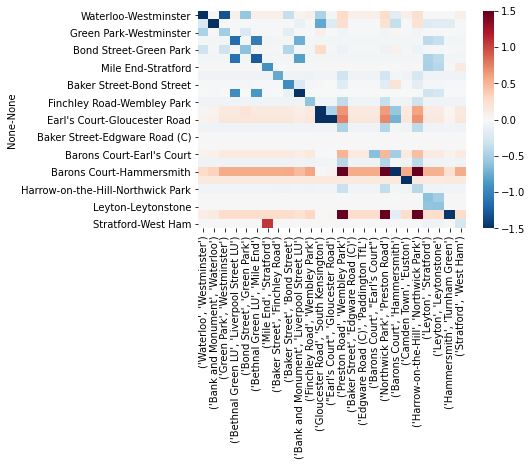

In [50]:
options = {
    'vmin':-1.5, 
    'vmax':1.5,
    'center':0,
    'cmap':'RdBu_r',
    }
sns.heatmap(diffdf.loc[lst,lst],**options)

In [33]:
diffdf

(Acton Town, Chiswick Park)  \
Acton Town      Chiswick Park                          -0.362837   
                Ealing Common                           0.434912   
                South Ealing                            0.095168   
                Turnham Green                           0.910147   
Aldgate         Liverpool Street LU                    -0.058026   
...                                                          ...   
Canning Town    North Greenwich                         0.000653   
Cutty Sark      Greenwich                               0.000000   
Greenwich       Deptford Bridge                         0.000000   
Deptford Bridge Elverson Road                           0.000000   
Elverson Road   Lewisham                                0.000000   

                                     (Acton Town, Ealing Common)  \
Acton Town      Chiswick Park                          -0.359453   
                Ealing Common                          -0.371404   
                South Ealing                            0.095168   
                Turnham Green                           0.484640   
Aldgate         Liverpool Street LU                    -0.058026   
...                                                          ...   
Canning Town    North Greenwich                         0.000653   
Cutty Sark      Greenwich                               0.000000   
Greenwich       Deptford Bridge                         0.000000   
Deptford Bridge Elverson Road                           0.000000   
Elverson Road   Lewisham                                0.000000   

                                     (Acton Town, South Ealing)  \
Acton Town      Chiswick Park                         -0.346326   
                Ealing Common                          0.361579   
                South Ealing                          -0.312204   
                Turnham Green                          0.450951   
Aldgate         Liverpool Street LU                   -0.058194   
...                                                         ...   
Canning Town    North Greenwich                       -0.000735   
Cutty Sark      Greenwich                              0.000000   
Greenwich       Deptford Bridge                        0.000000   
Deptford Bridge Elverson Road                          0.000000   
Elverson Road   Lewisham                               0.000000   

                                     (Acton Town, Turnham Green)  \
Acton Town      Chiswick Park                           0.186927   
                Ealing Common                           0.210175   
                South Ealing                            0.095168   
                Turnham Green                          -0.160557   
Aldgate         Liverpool Street LU                    -0.058026   
...                                                          ...   
Canning Town    North Greenwich                         0.000653   
Cutty Sark      Greenwich                               0.000000   
Greenwich       Deptford Bridge                         0.000000   
Deptford Bridge Elverson Road                           0.000000   
Elverson Road   Lewisham                                0.000000   

                                     (Aldgate, Liverpool Street LU)  \
Acton Town      Chiswick Park                             -0.343727   
                Ealing Common                              0.434912   
                South Ealing                               0.095168   
                Turnham Green                              0.878851   
Aldgate         Liverpool Street LU                       -0.229868   
...                                                             ...   
Canning Town    North Greenwich                            0.000653   
Cutty Sark      Greenwich                                  0.000000   
Greenwich       Deptford Bridge                            0.000000   
Deptford Bridge Elverson Road                              0.000000   


In [25]:
table = fl.load_obj('passengertable', 'dataframes/')

In [20]:
scr.timeslots[1]

'AM Peak (0700-1000)'

In [55]:
pd.Series(nx.get_edge_attributes(basepassenger.get(scr.timeslots[0]), 'passengers'))    

Acton Town       Chiswick Park          2576
                 Ealing Common          1070
                 South Ealing           2180
                 Turnham Green           805
Aldgate          Liverpool Street LU    1614
                                        ... 
Canning Town     North Greenwich        7455
Cutty Sark       Greenwich                 0
Greenwich        Deptford Bridge           0
Deptford Bridge  Elverson Road             0
Elverson Road    Lewisham                  0
Length: 349, dtype: int64

In [101]:
col = table["Morning (0500-0700)"].columns[0]

In [102]:
table["Morning (0500-0700)"][col]

Acton Town       Chiswick Park            0
                 Ealing Common          110
                 South Ealing           177
                 Turnham Green          358
Aldgate          Liverpool Street LU      0
                                       ... 
Canning Town     North Greenwich        550
Cutty Sark       Greenwich                0
Greenwich        Deptford Bridge          0
Deptford Bridge  Elverson Road            0
Elverson Road    Lewisham                 0
Name: (Acton Town, Chiswick Park), Length: 349, dtype: int64

In [113]:
pcol = pd.Series(nx.get_edge_attributes(basepassenger.get(scr.timeslots[0]), 'passengers'))    
capcol = pd.Series(nx.get_edge_attributes(basepassenger.get(scr.timeslots[0]), 'capacity'))    

In [114]:
col = table["Morning (0500-0700)"][('Acton Town', 'Chiswick Park')]

In [115]:
(col - basep)/basec

Acton Town       Chiswick Park         -0.149411
                 Ealing Common         -0.155945
                 South Ealing          -0.195224
                 Turnham Green              -inf
Aldgate          Liverpool Street LU   -0.096624
                                          ...   
Canning Town     North Greenwich       -0.254562
Cutty Sark       Greenwich              0.000000
Greenwich        Deptford Bridge        0.000000
Deptford Bridge  Elverson Road          0.000000
Elverson Road    Lewisham                    NaN
Length: 349, dtype: float64

In [35]:
basepassenger = fl.load_obj('basepassenger')
basepassfix = fl.load_obj('basepassfixed')


In [42]:
list(basepassenger.values())[0]

True

In [7]:
pasdf.to_excel('passenger_output.xlsx', sheet_name='pas')

In [8]:
diffdf.to_excel('difference_output.xlsx', sheet_name='diff')

In [1]:
sns.heatmap(diffdf.head())

NameError: name 'sns' is not defined

In [28]:
diffdf

(Acton Town, Chiswick Park)  \
Acton Town      Chiswick Park                          -0.154586   
                Ealing Common                           0.626396   
                South Ealing                            0.267439   
                Turnham Green                                inf   
Aldgate         Liverpool Street LU                    -0.045050   
...                                                          ...   
Canning Town    North Greenwich                         0.000531   
Cutty Sark      Greenwich                               0.000000   
Greenwich       Deptford Bridge                         0.000000   
Deptford Bridge Elverson Road                           0.000000   
Elverson Road   Lewisham                                     NaN   

                                     (Acton Town, Ealing Common)  \
Acton Town      Chiswick Park                          -0.151605   
                Ealing Common                          -0.271531   
                South Ealing                            0.267439   
                Turnham Green                                inf   
Aldgate         Liverpool Street LU                    -0.045050   
...                                                          ...   
Canning Town    North Greenwich                         0.000531   
Cutty Sark      Greenwich                               0.000000   
Greenwich       Deptford Bridge                         0.000000   
Deptford Bridge Elverson Road                           0.000000   
Elverson Road   Lewisham                                     NaN   

                                     (Acton Town, South Ealing)  \
Acton Town      Chiswick Park                         -0.140721   
                Ealing Common                          0.545122   
                South Ealing                          -0.145886   
                Turnham Green                               inf   
Aldgate         Liverpool Street LU                   -0.045278   
...                                                         ...   
Canning Town    North Greenwich                       -0.000837   
Cutty Sark      Greenwich                              0.000000   
Greenwich       Deptford Bridge                        0.000000   
Deptford Bridge Elverson Road                          0.000000   
Elverson Road   Lewisham                                    NaN   

                                     (Acton Town, Turnham Green)  \
Acton Town      Chiswick Park                           0.382486   
                Ealing Common                           0.381446   
                South Ealing                            0.267439   
                Turnham Green                               -inf   
Aldgate         Liverpool Street LU                    -0.045050   
...                                                          ...   
Canning Town    North Greenwich                         0.000531   
Cutty Sark      Greenwich                               0.000000   
Greenwich       Deptford Bridge                         0.000000   
Deptford Bridge Elverson Road                           0.000000   
Elverson Road   Lewisham                                     NaN   

                                     (Aldgate, Liverpool Street LU)  \
Acton Town      Chiswick Park                             -0.138725   
                Ealing Common                              0.626396   
                South Ealing                               0.267439   
                Turnham Green                                   inf   
Aldgate         Liverpool Street LU                       -0.222587   
...                                                             ...   
Canning Town    North Greenwich                            0.000531   
Cutty Sark      Greenwich                                  0.000000   
Greenwich       Deptford Bridge                            0.000000   
Deptford Bridge Elverson Road                              0.000000   
